In [1]:
#начнем
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, OneHotEncoder, PolynomialFeatures, LabelEncoder
from sklearn.tree import DecisionTreeClassifier

from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

import seaborn as sns

### Начало!!

In [2]:
#df = pd.read_csv('post_07_10_2020_1.csv', sep=';')
df = pd.read_csv('post_18_12_2020.csv', sep=';')

In [3]:
df

N  Артикул  Код характеристики   Группа номенклатуры  \
0         1   699065                 NaN        Силуэты разные   
1         2   680157                 NaN                Сердца   
2         3   695153                 NaN                Сердца   
3         4   680158                 NaN                Сердца   
4         5   680160                 NaN                  Яйца   
...     ...      ...                 ...                   ...   
8017  8 018   901404                 NaN                Мебель   
8018  8 019   903487                 NaN      Основы для часов   
8019  8 020   558426                 NaN  Пасхальные заготовки   
8020  8 021   558425                 NaN  Пасхальные заготовки   
8021  8 022   558428                 NaN  Пасхальные заготовки   

             Основной поставщик Ед. изм.  Фасовка айрис  Коэффициент единицы  \
0                  ВАСИЛИСА ООО       шт            5.0                  1.0   
1     BOVELACCI S.R.L. (Италия)       шт           10.0                  1.0   
2     BOVELACCI S.R.L. (Италия)       шт           10.0                  1.0   
3     BOVELACCI S.R.L. (Италия)       шт            5.0                  1.0   
4     BOVELACCI S.R.L. (Италия)       шт           10.0                  1.0   
...                         ...      ...            ...                  ...   
8017               ВАСИЛИСА ООО       шт            1.0                  1.0   
8018               ВАСИЛИСА ООО       шт            1.0                  1.0   
8019               ВАСИЛИСА ООО       шт            1.0                  1.0   
8020               ВАСИЛИСА ООО       шт            1.0                  1.0   
8021               ВАСИЛИСА ООО       шт            1.0                  1.0   

      Средние продажи  Цена продажи  ...  Кол-во дискретов в ктр были продажи  \
0               0.781          64.0  ...                                  4.0   
1               1.653          63.0  ...                                  7.0   
2               0.773          29.0  ...                                  6.0   
3               2.180         101.0  ...                                  5.0   
4               2.317          28.0  ...                                  6.0   
...               ...           ...  ...                                  ...   
8017            0.342         173.0  ...                                  4.0   
8018            0.432         205.0  ...                                  4.0   
8019            1.587          64.0  ...                                  2.0   
8020            1.587          64.0  ...                                  2.0   
8021            1.587          64.0  ...                                  2.0   

      Дней пристутств. продаже  Закупка за период  Статус товара Айриса  \
0                          374               22.0               Удалить   
1                          374              147.0            Регулярный   
2                          374              201.0            Регулярный   
3                          374              236.0            Регулярный   
4                          311              887.0            Регулярный   
...                        ...                ...                   ...   
8017                       364               33.0               Удалить   
8018                       186              117.0            Регулярный   
8019                        51              124.0          Ждет решения   
8020                        51              142.0          Ждет решения   
8021                        44              120.0          Ждет решения   

      Категория товара ABC Категория товара АВС Айриса Закупочная цена  \
0                        B                           C           17.96   
1                        B                           A           10.50   
2                        B                           C            7.31   
3                        A                           A           51.60   
4           

In [4]:
df[df['Минимальный остаток']==90] # быстрая оценка значений классов:

N  Артикул  Код характеристики Группа номенклатуры  \
1174  1 175   522741                 NaN     Крючки для штор   

     Основной поставщик Ед. изм.  Фасовка айрис  Коэффициент единицы  \
1174     ПРОТОС и К ООО       шт          100.0                  1.0   

      Средние продажи  Цена продажи  ...  Кол-во дискретов в ктр были продажи  \
1174           18.822           6.0  ...                                  6.0   

      Дней пристутств. продаже  Закупка за период  Статус товара Айриса  \
1174                       374            21993.0            Регулярный   

      Категория товара ABC Категория товара АВС Айриса Закупочная цена  \
1174                    AA                          AA            0.96   

     Коэффициент минимальной поставки излишков  Минимальный остаток  \
1174                                      20.0                 90.0   

      Нормативный остаток  
1174                200.0  

[1 rows x 22 columns]

In [5]:
df[df['Закупка за период']<0] #быстрая оценка признаков

N  Артикул  Код характеристики Группа номенклатуры  \
241     242  7708688                 5.0        Декоративные   
3041  3 042  7707486                 NaN     Крючки для штор   
6401  6 402   679103                59.0               АСТРА   

                  Основной поставщик Ед. изм.  Фасовка айрис  \
241         Китай Sheng Tong Fashion     упак            5.0   
3041            Китай Linda (KAIXIN)       шт          100.0   
6401  Троицкая камвольная фабрика АО     упак            1.0   

      Коэффициент единицы  Средние продажи  Цена продажи  ...  \
241                   1.0            0.725          89.0  ...   
3041                100.0            6.132           3.0  ...   
6401                  1.0            0.521         197.0  ...   

      Кол-во дискретов в ктр были продажи  Дней пристутств. продаже  \
241                                   3.0                       180   
3041                                  4.0                       374   
6401                                  2.0                       139   

      Закупка за период  Статус товара Айриса  Категория товара ABC  \
241               -10.0               Удалить                     C   
3041            -7983.0               Удалить                     B   
6401               -2.0            Регулярный                     C   

     Категория товара АВС Айриса Закупочная цена  \
241                            C           46.00   
3041                           C            3.00   
6401                           C           59.54   

     Коэффициент минимальной поставки излишков  Минимальный остаток  \
241                                        NaN                  2.0   
3041                                      20.0                 20.0   
6401                                       NaN                  1.0   

      Нормативный остаток  
241                   5.0  
3041                100.0  
6401                  2.0  

[3 rows x 22 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8022 entries, 0 to 8021
Data columns (total 22 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   N                                          8022 non-null   object 
 1   Артикул                                    8022 non-null   int64  
 2   Код характеристики                         5186 non-null   float64
 3   Группа номенклатуры                        8022 non-null   object 
 4   Основной поставщик                         8022 non-null   object 
 5   Ед. изм.                                   8022 non-null   object 
 6   Фасовка айрис                              8022 non-null   float64
 7   Коэффициент единицы                        8022 non-null   float64
 8   Средние продажи                            7883 non-null   float64
 9   Цена продажи                               8022 non-null   float64
 10  Продано всего           

#### Начинаем работу со строками:

In [7]:
df.drop(['N', 'Артикул', 'Код характеристики', 'Коэффициент минимальной поставки излишков'], axis=1, inplace=True)

In [8]:
df.dropna(subset=['Статус товара Айриса', 'Ед. изм.', 'Фасовка айрис', 
                  'Коэффициент единицы', 'Цена продажи', 'Закупочная цена'], inplace=True)

In [9]:
ind_for_drop = df[(df['Средние продажи'].isna() & df['Кол-во сделок'] > 0) | (df['Закупка за период'] < 0)].index #### удалить строчки, в ктр средние продажи = 0, а кол-во сделок> 0
df_1 = df.drop(list(ind_for_drop))

In [10]:
list(ind_for_drop)

[241, 619, 2396, 3041, 4353, 6401]

In [11]:
df_1.describe(include='object')

Группа номенклатуры Основной поставщик Ед. изм. Статус товара Айриса  \
count                 8015               8015     8015                 8015   
unique                 536                255       29                   12   
top                  Астра   Preciosa (Чехия)       шт           Регулярный   
freq                   336                509     4299                 5716   

       Категория товара ABC Категория товара АВС Айриса  
count                  7988                        7400  
unique                    4                           4  
top                       A                           A  
freq                   4062                        2535

In [12]:
df_1[['Минимальный остаток', 'Нормативный остаток']]

Минимальный остаток  Нормативный остаток
0                     1.0                  5.0
1                     2.0                 10.0
2                     2.0                 10.0
3                     1.0                  5.0
4                     3.0                 10.0
...                   ...                  ...
8017                  0.0                  2.0
8018                  NaN                  NaN
8019                  NaN                  NaN
8020                  NaN                  NaN
8021                  NaN                  NaN

[8015 rows x 2 columns]

In [13]:
# Поиграем с типами данных для targets
# df[['Минимальный остаток', 'Нормативный остаток']] = df[['Минимальный остаток', 'Нормативный остаток']].round()


In [14]:
df_1[['Минимальный остаток', 'Нормативный остаток']]

Минимальный остаток  Нормативный остаток
0                     1.0                  5.0
1                     2.0                 10.0
2                     2.0                 10.0
3                     1.0                  5.0
4                     3.0                 10.0
...                   ...                  ...
8017                  0.0                  2.0
8018                  NaN                  NaN
8019                  NaN                  NaN
8020                  NaN                  NaN
8021                  NaN                  NaN

[8015 rows x 2 columns]

In [15]:
df_1.describe()

Фасовка айрис  Коэффициент единицы  Средние продажи  Цена продажи  \
count    8015.000000          8015.000000      7879.000000   8015.000000   
mean       14.931502             1.220679         1.054304    171.846750   
std        30.459433             3.170625         2.301719    343.146497   
min         1.000000             1.000000        -0.023000      1.000000   
25%         1.000000             1.000000         0.303000     28.000000   
50%         5.000000             1.000000         0.540000     77.000000   
75%        12.000000             1.000000         1.047500    182.000000   
max      1000.000000           100.000000        81.976000   6697.000000   

       Продано всего  Кол-во сделок  Кол-во дискретов в ктр были продажи  \
count    7879.000000    7879.000000                          7879.000000   
mean       12.208364       6.847950                             3.927529   
std        27.349776       9.134908                             2.048585   
min        -0.300000       1.000000                             1.000000   
25%         3.400000       3.000000                             3.000000   
50%         6.100000       5.000000                             4.000000   
75%        11.900000       8.000000                             5.000000   
max      1005.000000     175.000000                            12.000000   

       Дней пристутств. продаже  Закупка за период  Закупочная цена  \
count               8015.000000        8001.000000      8015.000000   
mean                 339.280100         420.264129        79.128452   
std                   67.391592        1088.560413       193.245291   
min                    6.000000           1.000000         0.130000   
25%                  337.000000          88.300000         9.450000   
50%                  374.000000         201.000000        30.570000   
75%                  374.000000         410.000000        70.795000   
max                  374.000000       29178.000000      3629.000000   

       Минимальный остаток  Нормативный остаток  
count          6952.000000          6952.000000  
mean              4.057322            16.750216  
std               4.828454            30.641176  
min               0.000000             0.100000  
25%               2.000000             3.000000  
50%               3.000000            10.000000  
75%               5.000000            20.000000  
max             100.000000           674.000000

In [16]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8015 entries, 0 to 8021
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Группа номенклатуры                  8015 non-null   object 
 1   Основной поставщик                   8015 non-null   object 
 2   Ед. изм.                             8015 non-null   object 
 3   Фасовка айрис                        8015 non-null   float64
 4   Коэффициент единицы                  8015 non-null   float64
 5   Средние продажи                      7879 non-null   float64
 6   Цена продажи                         8015 non-null   float64
 7   Продано всего                        7879 non-null   float64
 8   Кол-во сделок                        7879 non-null   float64
 9   Кол-во дискретов в ктр были продажи  7879 non-null   float64
 10  Дней пристутств. продаже             8015 non-null   int64  
 11  Закупка за период             

In [17]:
X = df_1.drop(['Минимальный остаток', 'Нормативный остаток'], axis=1)
y = df_1.loc[:, ['Минимальный остаток', 'Нормативный остаток']]   # таргет

In [18]:
y_need = y[df_1['Минимальный остаток'].isna()] # отфильтровываем неизвестные значения МИН
X_need = X.loc[list(y_need.index)] 

y_filter = y.drop(list(y_need.index))      # формируем значения МИН и МАХа на ктр будем обучаться

X_filter = X.drop(list(y_need.index))      # формируем соответствующие данные на ктр будем обучаться

In [21]:
y_need

Минимальный остаток  Нормативный остаток
91                    NaN                  NaN
97                    NaN                  NaN
101                   NaN                  NaN
104                   NaN                  NaN
107                   NaN                  NaN
...                   ...                  ...
8016                  NaN                  NaN
8018                  NaN                  NaN
8019                  NaN                  NaN
8020                  NaN                  NaN
8021                  NaN                  NaN

[1063 rows x 2 columns]

In [19]:
y_filter_min = y_filter['Минимальный остаток']
y_filter_max = y_filter['Нормативный остаток']

In [37]:
y_filter_min.shape


(6952,)

In [21]:
X_filter


Группа номенклатуры         Основной поставщик Ед. изм.  Фасовка айрис  \
0         Силуэты разные               ВАСИЛИСА ООО       шт            5.0   
1                 Сердца  BOVELACCI S.R.L. (Италия)       шт           10.0   
2                 Сердца  BOVELACCI S.R.L. (Италия)       шт           10.0   
3                 Сердца  BOVELACCI S.R.L. (Италия)       шт            5.0   
4                   Яйца  BOVELACCI S.R.L. (Италия)       шт           10.0   
...                  ...                        ...      ...            ...   
8012              Мебель               ВАСИЛИСА ООО       шт            1.0   
8013              Мебель               ВАСИЛИСА ООО       шт            1.0   
8014              Мебель               ВАСИЛИСА ООО       шт            1.0   
8015              Мебель               ВАСИЛИСА ООО       шт            1.0   
8017              Мебель               ВАСИЛИСА ООО       шт            1.0   

      Коэффициент единицы  Средние продажи  Цена продажи  Продано всего  \
0                     1.0            0.781          64.0            9.6   
1                     1.0            1.653          63.0           20.3   
2                     1.0            0.773          29.0            9.5   
3                     1.0            2.180         101.0           26.7   
4                     1.0            2.317          28.0           27.8   
...                   ...              ...           ...            ...   
8012                  1.0            0.301         166.0            3.6   
8013                  1.0            0.290         138.0            3.6   
8014                  1.0            0.719          93.0            8.8   
8015                  1.0            0.301         179.0            3.6   
8017                  1.0            0.342         173.0            4.2   

      Кол-во сделок  Кол-во дискретов в ктр были продажи  \
0               7.0                                  4.0   
1              15.0                                  7.0   
2               7.0                                  6.0   
3              16.0                                  5.0   
4               7.0                                  6.0   
...             ...                                  ...   
8012            3.0                                  3.0   
8013            4.0                                  4.0   
8014            7.0                                  5.0   
8015            3.0                                  3.0   
8017            4.0                                  4.0   

      Дней пристутств. продаже  Закупка за период Статус товара Айриса  \
0                          374               22.0              Удалить   
1                          374              147.0           Регулярный   
2                          374              201.0           Регулярный   
3                          374              236.0           Регулярный   
4                          311              887.0           Регулярный   
...                        ...                ...                  ...   
8012                       361              114.0           Регулярный   
8013                       357              132.0           Регулярный   
8014                       341              225.0           Регулярный   
8015                       311               60.0           Регулярный   
8017                       364               33.0              Удалить   

     Категория товара ABC Категория товара АВС Айриса  Закупочная цена  
0                       B                           C            17.96  
1                       B                           A            10.50  
2                       B                           C             7.31  
3                       A                           A            51.60  
4                       A                           A            12.83  
...                   ...                         ...              ...  
8012                    A         

In [22]:
y_filter

Минимальный остаток  Нормативный остаток
0                     1.0                  5.0
1                     2.0                 10.0
2                     2.0                 10.0
3                     1.0                  5.0
4                     3.0                 10.0
...                   ...                  ...
8012                  0.0                  2.0
8013                  0.0                  2.0
8014                  0.0                  2.0
8015                  0.0                  2.0
8017                  0.0                  2.0

[6952 rows x 2 columns]

#### Построим гистограммы, чтоб визуально посмотреть на частотное распределение меток классов МИН и МАХ: 

Text(0, 0.5, 'Count')

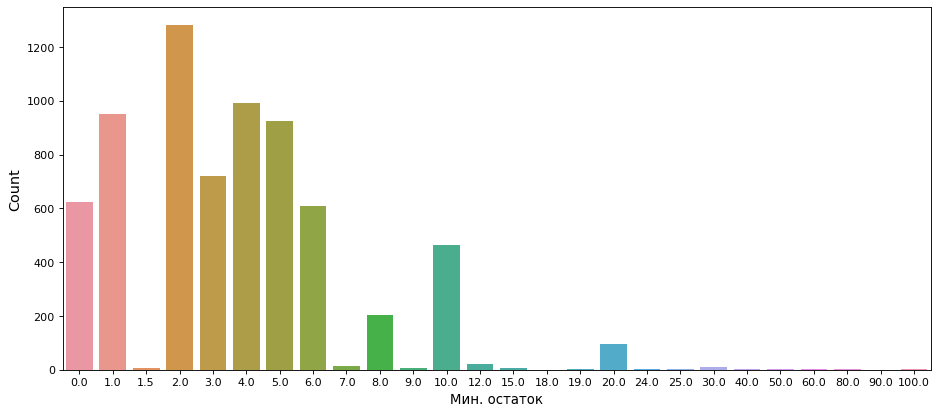

In [23]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x='Минимальный остаток', data=y_filter)
plt.xlabel('Мин. остаток', fontsize=12)
plt.ylabel('Count', fontsize=13)

In [24]:
print(y_filter.loc[:, 'Минимальный остаток'].value_counts())
len(y_filter.loc[:, 'Минимальный остаток'].value_counts())

2.0      1283
4.0       993
1.0       951
5.0       926
3.0       721
0.0       622
6.0       608
10.0      462
8.0       203
20.0       95
12.0       20
7.0        15
30.0       10
9.0         8
15.0        5
1.5         5
60.0        4
100.0       4
40.0        3
50.0        3
19.0        3
80.0        2
24.0        2
25.0        2
18.0        1
90.0        1
Name: Минимальный остаток, dtype: int64


26

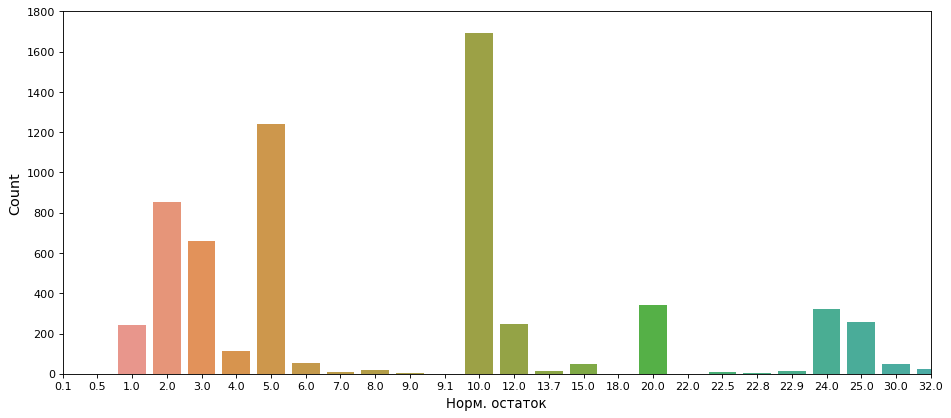

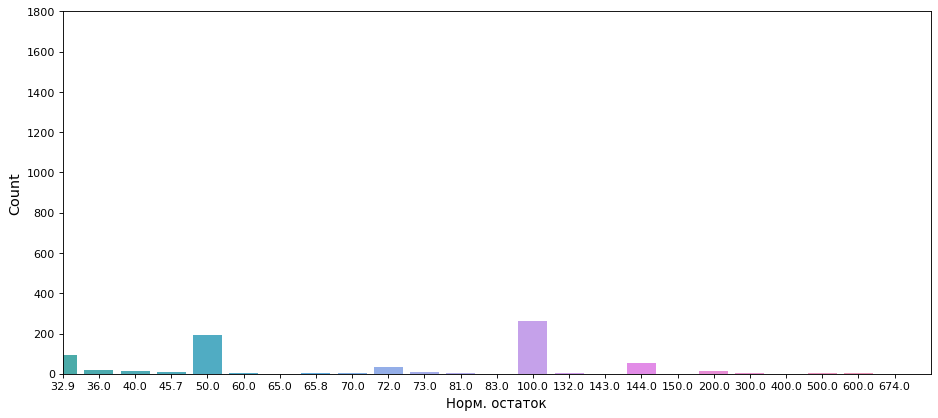

In [25]:
# figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
fig,ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x='Нормативный остаток', data=y_filter)
# plt.axis([0.0, 70])
plt.xlabel('Норм. остаток', fontsize=12)
plt.ylabel('Count', fontsize=13)
#ax.set(xlim=(0, 300))
plt.axis([0.0, 25, 0, 1800])
#ax.set_xticklabels(range(0,50))
plt.show()


# figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
fig,ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x='Нормативный остаток', data=y_filter)
# plt.axis([0.0, 70])
plt.xlabel('Норм. остаток', fontsize=12)
plt.ylabel('Count', fontsize=13)
#plt.xticks(y_filter.loc[:, 'Нормативный остаток'])
#ax.set(xlim=(0, 100))
plt.axis([26, 50, 0, 1800])
# ax.set_xticklabels(range(0,50))
plt.show()


In [22]:
print(y_filter.loc[:, 'Нормативный остаток'].value_counts())
len(y_filter.loc[:, 'Нормативный остаток'].value_counts())

10.0     1695
5.0      1241
2.0       851
3.0       659
20.0      342
24.0      321
100.0     262
25.0      256
12.0      246
1.0       244
50.0      192
4.0       115
32.9       92
6.0        56
144.0      55
15.0       50
30.0       49
72.0       36
32.0       23
36.0       19
8.0        17
40.0       15
13.7       14
200.0      14
22.9       12
22.5       11
45.7        9
7.0         8
73.0        8
65.8        5
60.0        4
132.0       4
70.0        3
500.0       3
22.8        2
9.0         2
81.0        2
300.0       2
600.0       2
0.5         1
18.0        1
22.0        1
83.0        1
674.0       1
65.0        1
143.0       1
150.0       1
400.0       1
9.1         1
0.1         1
Name: Нормативный остаток, dtype: int64


50

### Сделаем балансироваку классов:

In [34]:
le = LabelEncoder()

y_filter_min_le = le.fit_transform(y_filter_min)
y_filter_max_le = le.fit_transform(y_filter_max)

In [35]:
ros = RandomOverSampler(random_state=0)

X_resampled_min, y_resampled_min = ros.fit_resample(X_filter, y_filter_min_le)
X_resampled_max, y_resampled_max = ros.fit_resample(X_filter, y_filter_max_le)


In [36]:
#from sklearn.utils import check_X_y
#check_X_y(X_filter, y_filter_min_le)

In [27]:
X_filter

Группа номенклатуры         Основной поставщик Ед. изм.  Фасовка айрис  \
0         Силуэты разные               ВАСИЛИСА ООО       шт            5.0   
1                 Сердца  BOVELACCI S.R.L. (Италия)       шт           10.0   
2                 Сердца  BOVELACCI S.R.L. (Италия)       шт           10.0   
3                 Сердца  BOVELACCI S.R.L. (Италия)       шт            5.0   
4                   Яйца  BOVELACCI S.R.L. (Италия)       шт           10.0   
...                  ...                        ...      ...            ...   
8012              Мебель               ВАСИЛИСА ООО       шт            1.0   
8013              Мебель               ВАСИЛИСА ООО       шт            1.0   
8014              Мебель               ВАСИЛИСА ООО       шт            1.0   
8015              Мебель               ВАСИЛИСА ООО       шт            1.0   
8017              Мебель               ВАСИЛИСА ООО       шт            1.0   

      Коэффициент единицы  Средние продажи  Цена продажи  Продано всего  \
0                     1.0            0.781          64.0            9.6   
1                     1.0            1.653          63.0           20.3   
2                     1.0            0.773          29.0            9.5   
3                     1.0            2.180         101.0           26.7   
4                     1.0            2.317          28.0           27.8   
...                   ...              ...           ...            ...   
8012                  1.0            0.301         166.0            3.6   
8013                  1.0            0.290         138.0            3.6   
8014                  1.0            0.719          93.0            8.8   
8015                  1.0            0.301         179.0            3.6   
8017                  1.0            0.342         173.0            4.2   

      Кол-во сделок  Кол-во дискретов в ктр были продажи  \
0               7.0                                  4.0   
1              15.0                                  7.0   
2               7.0                                  6.0   
3              16.0                                  5.0   
4               7.0                                  6.0   
...             ...                                  ...   
8012            3.0                                  3.0   
8013            4.0                                  4.0   
8014            7.0                                  5.0   
8015            3.0                                  3.0   
8017            4.0                                  4.0   

      Дней пристутств. продаже  Закупка за период Статус товара Айриса  \
0                          374               22.0              Удалить   
1                          374              147.0           Регулярный   
2                          374              201.0           Регулярный   
3                          374              236.0           Регулярный   
4                          311              887.0           Регулярный   
...                        ...                ...                  ...   
8012                       361              114.0           Регулярный   
8013                       357              132.0           Регулярный   
8014                       341              225.0           Регулярный   
8015                       311               60.0           Регулярный   
8017                       364               33.0              Удалить   

     Категория товара ABC Категория товара АВС Айриса  Закупочная цена  
0                       B                           C            17.96  
1                       B                           A            10.50  
2                       B                           C             7.31  
3                       A                           A            51.60  
4                       A                           A            12.83  
...                   ...                         ...              ...  
8012                    A         

In [28]:
X_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6952 entries, 0 to 8017
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Группа номенклатуры                  6952 non-null   object 
 1   Основной поставщик                   6952 non-null   object 
 2   Ед. изм.                             6952 non-null   object 
 3   Фасовка айрис                        6952 non-null   float64
 4   Коэффициент единицы                  6952 non-null   float64
 5   Средние продажи                      6816 non-null   float64
 6   Цена продажи                         6952 non-null   float64
 7   Продано всего                        6816 non-null   float64
 8   Кол-во сделок                        6816 non-null   float64
 9   Кол-во дискретов в ктр были продажи  6816 non-null   float64
 10  Дней пристутств. продаже             6952 non-null   int64  
 11  Закупка за период             

In [25]:
print(len(X_resampled_min))
print(len(X_resampled_max))

33358
84750


In [30]:
pd.DataFrame(X_resampled_max)
#pd.DataFrame(y_resampled_max)

Группа номенклатуры         Основной поставщик Ед. изм.  Фасовка айрис  \
0          Силуэты разные               ВАСИЛИСА ООО       шт            5.0   
1                  Сердца  BOVELACCI S.R.L. (Италия)       шт           10.0   
2                  Сердца  BOVELACCI S.R.L. (Италия)       шт           10.0   
3                  Сердца  BOVELACCI S.R.L. (Италия)       шт            5.0   
4                    Яйца  BOVELACCI S.R.L. (Италия)       шт           10.0   
...                   ...                        ...      ...            ...   
84745        Ограничители          Китай MH Industry       шт          674.0   
84746        Ограничители          Китай MH Industry       шт          674.0   
84747        Ограничители          Китай MH Industry       шт          674.0   
84748        Ограничители          Китай MH Industry       шт          674.0   
84749        Ограничители          Китай MH Industry       шт          674.0   

       Коэффициент единицы  Средние продажи  Цена продажи  Продано всего  \
0                     1.00            0.781          64.0            9.6   
1                     1.00            1.653          63.0           20.3   
2                     1.00            0.773          29.0            9.5   
3                     1.00            2.180         101.0           26.7   
4                     1.00            2.317          28.0           27.8   
...                    ...              ...           ...            ...   
84745                 6.74            4.293           5.0           52.6   
84746                 6.74            4.293           5.0           52.6   
84747                 6.74            4.293           5.0           52.6   
84748                 6.74            4.293           5.0           52.6   
84749                 6.74            4.293           5.0           52.6   

       Кол-во сделок  Кол-во дискретов в ктр были продажи  \
0                7.0                                  4.0   
1               15.0                                  7.0   
2                7.0                                  6.0   
3               16.0                                  5.0   
4                7.0                                  6.0   
...              ...                                  ...   
84745            1.0                                  1.0   
84746            1.0                                  1.0   
84747            1.0                                  1.0   
84748            1.0                                  1.0   
84749            1.0                                  1.0   

       Дней пристутств. продаже  Закупка за период Статус товара Айриса  \
0                           374               22.0              Удалить   
1                           374              147.0           Регулярный   
2                           374              201.0           Регулярный   
3                           374              236.0           Регулярный   
4                           311              887.0           Регулярный   
...                         ...                ...                  ...   
84745                       374            13451.0           Регулярный   
84746                       374            13451.0           Регулярный   
84747                       374            13451.0           Регулярный   
84748                       374            13451.0           Регулярный   
84749                       374            13451.0           Регулярный   

      Категория товара ABC Категория товара АВС Айриса  Закупочная цена  
0                        B                           C            17.96  
1                        B                           A            10.50  
2                        B                           C             7.31  
3                        A                           A            51.60  
4                        A                           A            12.83  
...                    ...                         ...

In [26]:
X_resampled_max.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84750 entries, 0 to 84749
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Группа номенклатуры                  84750 non-null  object 
 1   Основной поставщик                   84750 non-null  object 
 2   Ед. изм.                             84750 non-null  object 
 3   Фасовка айрис                        84750 non-null  float64
 4   Коэффициент единицы                  84750 non-null  float64
 5   Средние продажи                      84427 non-null  float64
 6   Цена продажи                         84750 non-null  float64
 7   Продано всего                        84427 non-null  float64
 8   Кол-во сделок                        84427 non-null  float64
 9   Кол-во дискретов в ктр были продажи  84427 non-null  float64
 10  Дней пристутств. продаже             84750 non-null  int64  
 11  Закупка за период           

In [31]:
le.inverse_transform(y_resampled_max)

array([  5.,  10.,  10., ..., 674., 674., 674.])

In [32]:
pd.DataFrame(le.inverse_transform(y_resampled_max))

0
0        5.0
1       10.0
2       10.0
3        5.0
4       10.0
...      ...
84745  674.0
84746  674.0
84747  674.0
84748  674.0
84749  674.0

[84750 rows x 1 columns]

In [33]:
print(sorted(Counter(y_resampled_min).items()))
print(sorted(Counter(y_resampled_max).items()))

[(0, 1283), (1, 1283), (2, 1283), (3, 1283), (4, 1283), (5, 1283), (6, 1283), (7, 1283), (8, 1283), (9, 1283), (10, 1283), (11, 1283), (12, 1283), (13, 1283), (14, 1283), (15, 1283), (16, 1283), (17, 1283), (18, 1283), (19, 1283), (20, 1283), (21, 1283), (22, 1283), (23, 1283), (24, 1283), (25, 1283)]
[(0, 1695), (1, 1695), (2, 1695), (3, 1695), (4, 1695), (5, 1695), (6, 1695), (7, 1695), (8, 1695), (9, 1695), (10, 1695), (11, 1695), (12, 1695), (13, 1695), (14, 1695), (15, 1695), (16, 1695), (17, 1695), (18, 1695), (19, 1695), (20, 1695), (21, 1695), (22, 1695), (23, 1695), (24, 1695), (25, 1695), (26, 1695), (27, 1695), (28, 1695), (29, 1695), (30, 1695), (31, 1695), (32, 1695), (33, 1695), (34, 1695), (35, 1695), (36, 1695), (37, 1695), (38, 1695), (39, 1695), (40, 1695), (41, 1695), (42, 1695), (43, 1695), (44, 1695), (45, 1695), (46, 1695), (47, 1695), (48, 1695), (49, 1695)]


In [34]:
# классы сбалансированы, так что (stratify=y_filter) делать не будем
X_train_min, X_test_min, y_train_min, y_test_min = train_test_split(
    X_resampled_min, y_resampled_min, test_size=0.33, random_state=42
)
X_train_max, X_test_max, y_train_max, y_test_max = train_test_split(
    X_resampled_max, y_resampled_max, test_size=0.33, random_state=42
)

In [35]:
# Начнем трансформировать колонки, в зависимости от типа значений:
categorical_features_min = X_train_min.select_dtypes(include=[object])
categorical_features_max = X_train_max.select_dtypes(include=[object])

In [36]:
categorical_features_max

Группа номенклатуры  \
21075                                  Тесьма отделочная   
68095            Бейка трикотажная, эластичная окантовка   
16330                   Нитки "Комбинат им. С.М. Кирова"   
9421                                           Hobby&Pro   
81274                           Ленты, шнуры упаковочные   
...                                                  ...   
6265                                   Вешалки пришивные   
54886  Тесьма со стразами, бисером, мехом, пайетками,...   
76820                                    Крючки для штор   
860                                   Бисер  Preciosa 5г   
15795                                         Фасованная   

                                      Основной поставщик   Ед. изм.  \
21075               Китай Jinfeng Thread&Ribbon Co., Ltd          м   
68095                                  Китай MH Industry          м   
16330                             ПНК ИМ. С.М.КИРОВА ОАО         шт   
9421          Китай SKC (Ningbo Xinteng Needle Co., Ltd)       упак   
81274                                         КРОСНА ООО  упак(50м)   
...                                                  ...        ...   
6265   ТОРГОВЫЙ ДОМ ФУРНИШОП ООО (ТРЕЙД-ДЕКОР ФУРНИТУ...         шт   
54886  ТОРГОВЫЙ ДОМ ФУРНИШОП ООО (ТРЕЙД-ДЕКОР ФУРНИТУ...          м   
76820                                     ПРОТОС и К ООО         шт   
860                                     Preciosa (Чехия)         шт   
15795                                   Текстильторг ОДО         шт   

      Статус товара Айриса Категория товара ABC Категория товара АВС Айриса  
21075              Удалить                    B                         NaN  
68095           Регулярный                    A                           A  
16330           Регулярный                    C                           C  
9421            Регулярный                    A                           A  
81274           Регулярный                    A                           A  
...                    ...                  ...                         ...  
6265            Регулярный                    A                           A  
54886           Регулярный                    B                           B  
76820           Регулярный                   AA                          AA  
860                Фасовка                    C                           C  
15795           Регулярный                    A                          AA  

[56782 rows x 6 columns]

In [37]:
numerical_features_min = X_train_min.select_dtypes(include=[np.number])
numerical_features_max = X_train_max.select_dtypes(include=[np.number])

In [38]:
numerical_features_max

Фасовка айрис  Коэффициент единицы  Средние продажи  Цена продажи  \
21075           9.14                  1.0            0.526         151.0   
68095         132.00                  1.0            2.217          16.0   
16330           6.00                  1.0            0.362          68.0   
9421           50.00                 10.0            0.615          89.0   
81274          50.00                 50.0            1.415           4.0   
...              ...                  ...              ...           ...   
6265           10.00                  1.0            0.481          72.0   
54886          65.00                  1.0            2.261          32.0   
76820         100.00                  1.0           50.643           3.0   
860            10.00                  1.0            0.318          25.0   
15795           1.00                  1.0            0.295         154.0   

       Продано всего  Кол-во сделок  Кол-во дискретов в ктр были продажи  \
21075            6.5            4.0                                  3.0   
68095           27.2            7.0                                  5.0   
16330            4.4            4.0                                  4.0   
9421             7.5            7.0                                  6.0   
81274           17.0           15.0                                  7.0   
...              ...            ...                                  ...   
6265             5.9            4.0                                  3.0   
54886           27.7           13.0                                  5.0   
76820          620.9           21.0                                  9.0   
860              3.9            3.0                                  2.0   
15795            3.6            3.0                                  3.0   

       Дней пристутств. продаже  Закупка за период  Закупочная цена  
21075                       374               26.4           151.00  
68095                       374             2108.1             3.71  
16330                       374              102.0            37.07  
9421                        355              456.8             8.90  
81274                       281              561.1             1.04  
...                         ...                ...              ...  
6265                        374              712.0            72.00  
54886                       374              371.9            15.60  
76820                       354            29178.0             0.88  
860                         374              132.0             9.45  
15795                       374              229.0            39.65  

[56782 rows x 10 columns]

In [39]:
y_train_max

array([10, 40,  7, ..., 45, 12,  7], dtype=int64)

In [40]:
X_train_min.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22349 entries, 20041 to 15795
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Группа номенклатуры                  22349 non-null  object 
 1   Основной поставщик                   22349 non-null  object 
 2   Ед. изм.                             22349 non-null  object 
 3   Фасовка айрис                        22349 non-null  float64
 4   Коэффициент единицы                  22349 non-null  float64
 5   Средние продажи                      22171 non-null  float64
 6   Цена продажи                         22349 non-null  float64
 7   Продано всего                        22171 non-null  float64
 8   Кол-во сделок                        22171 non-null  float64
 9   Кол-во дискретов в ктр были продажи  22171 non-null  float64
 10  Дней пристутств. продаже             22349 non-null  int64  
 11  Закупка за период       

In [41]:
# будем вставлять 0
numerical_features_min_1 = numerical_features_min[
    ['Средние продажи', 'Продано всего','Кол-во сделок', 'Кол-во дискретов в ктр были продажи', 'Закупка за период']
]         
numerical_features_min_2 = numerical_features_min.drop(numerical_features_min_1.columns, axis=1)

numerical_features_max_1 = numerical_features_max[
    ['Средние продажи', 'Продано всего','Кол-во сделок', 'Кол-во дискретов в ктр были продажи', 'Закупка за период']
]         
numerical_features_max_2 = numerical_features_max.drop(numerical_features_max_1.columns, axis=1)

In [42]:
# здесь устанавливаем, что заполняем нулями отсутствующ. значения
imp_const = SimpleImputer(missing_values=np.nan, strategy='constant')

In [43]:
# указываем колонки для трансформации (общие и для мин и для мах):
numerical_features_1_col = numerical_features_min_1.columns  # будем вставлять 0 и производить PolynomialFeatures
numerical_features_2_col = numerical_features_min_2.columns  # будем только производить PolynomialFeatures
categorical_features_col = categorical_features_min.columns  # будем производить OHE

# указываем какой препроцессинг будем делать на разных колонках (параметры скалирования зададим непосредств.в grid_search):
numerical_transformer_1 = Pipeline(
    steps=[
        ('imp_const', imp_const),
        ('poly', PolynomialFeatures(interaction_only=True,include_bias = False)),
        ('scaler', 'passthrough')
        ]
)
numerical_transformer_2 = Pipeline(
    steps=[
        ('poly', PolynomialFeatures(interaction_only=True,include_bias = False)),
        ('scaler', 'passthrough')
        ]
)
categorical_transformer = Pipeline(
    steps=[
        ('imp_const', imp_const),
        ('ОНЕ', OneHotEncoder(sparse=False, handle_unknown='ignore'))
        ]
)

# создаем общий трансформатор:
data_transformer = ColumnTransformer(
    transformers=[
        ('numerical_1', numerical_transformer_1, numerical_features_1_col),
        ('numerical_2', numerical_transformer_2, numerical_features_2_col),
        ('categorical', categorical_transformer, categorical_features_col)])

### Наконец то подошли к классификации!!

In [44]:
# теперь возьмем DecisionTreeClassifier
en_Tree = Pipeline(
    steps=[('preprocessor', data_transformer),
        ('Tree', DecisionTreeClassifier(random_state=42, class_weight='balanced'))
        ]
)

In [45]:
# Создаем сетку поиска

# для DecisionTreeClassifier:
param_grid_tree = {
    'preprocessor__numerical_1__scaler': [StandardScaler()],
    'Tree__criterion':['gini','entropy'],
    'Tree__max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]
}

In [46]:
grid_search_min = GridSearchCV(en_Tree, param_grid=param_grid_tree)
grid_search_max = GridSearchCV(en_Tree, param_grid=param_grid_tree)

In [47]:
en_Tree.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'Tree', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__numerical_1', 'preprocessor__numerical_2', 'preprocessor__categorical', 'preprocessor__numerical_1__memory', 'preprocessor__numerical_1__steps', 'preprocessor__numerical_1__verbose', 'preprocessor__numerical_1__imp_const', 'preprocessor__numerical_1__poly', 'preprocessor__numerical_1__scaler', 'preprocessor__numerical_1__imp_const__add_indicator', 'preprocessor__numerical_1__imp_const__copy', 'preprocessor__numerical_1__imp_const__fill_value', 'preprocessor__numerical_1__imp_const__missing_values', 'preprocessor__numerical_1__imp_const__strategy', 'preprocessor__numerical_1__imp_const__verbose', 'preprocessor__numerical_1__poly__degree', 'preprocessor__numerical_1__poly__include_bias', 'preprocessor__numerical_1__poly__interaction_on

In [48]:
grid_min = grid_search_min.fit(X_train_min, y_train_min)

In [49]:
grid_min.best_params_

{'Tree__criterion': 'gini',
 'Tree__max_depth': 40,
 'preprocessor__numerical_1__scaler': StandardScaler()}

In [50]:
grid_max = grid_search_max.fit(X_train_max, y_train_max)

In [51]:
grid_max.best_params_

{'Tree__criterion': 'gini',
 'Tree__max_depth': 70,
 'preprocessor__numerical_1__scaler': StandardScaler()}

In [52]:
grid_min.score(X_train_min, y_train_min)

0.9996420421495369

In [53]:
grid_max.score(X_train_max, y_train_max)

1.0

In [54]:
pred_min = grid_min.predict(X_test_min)
pred_max = grid_max.predict(X_test_max)

In [55]:
# С этого момента уже не сохранилось!!! 28.12.2020
# НЕ ЗАБЫТЬ СДЕЛАТЬ ОБРАТНОЕ ПРЕОБРАЗОВАН на  ЛЭЙБЛ!!!!(обратное рпеобразование делать после всех метрик, 
# иначе будет выдавать ошибку: continuous is not supported)

In [56]:
frame_min = [
    pd.DataFrame(pred_min, columns=['predict']), 
    pd.DataFrame(y_test_min, columns=['Минимальный остаток']).reset_index(drop=True), X_test_min['Фасовка айрис'].reset_index(drop=True)
]
frame_max = [
    pd.DataFrame(pred_max, columns=['predict']), 
    pd.DataFrame(y_test_max, columns=['Нормативный остаток']).reset_index(drop=True), X_test_max['Фасовка айрис'].reset_index(drop=True)
]


In [57]:
df3_min = pd.concat(frame_min, axis=1)
df3_max = pd.concat(frame_max, axis=1)

In [58]:
df3_min['prophet'] = df3_min['predict']    # 'это только для МИНИМАЛЬНОГО остатка !!!'
# df3_max['prophet'] = df3_max[['predict', 'Фасовка айрис']].max(axis=1)    # 'это только для НОРМАТИВНОГО остатка !!!'
df3_max['prophet'] = df3_max['predict']

In [59]:
IPython.display.HTML(df3_max.to_html())

#### Посмотрим на метрики:

In [60]:
accuracy_score(df3_min['Минимальный остаток'], df3_min['prophet'])

0.9484966845308384

In [61]:
accuracy_score(df3_max['Нормативный остаток'], df3_max['prophet'])

0.9933495423340961

In [62]:
precision_min, recall_min, fscore_min, support_min = score(df3_min['Минимальный остаток'], df3_min["prophet"])
precision_macro_min, recall_macro_min, fscore_macro_min, support_macro_min = score(df3_min['Минимальный остаток'], df3_min["prophet"], average='macro')
precision_micro_min, recall_micro_min, fscore_micro_min, support_micro_min = score(df3_min['Минимальный остаток'], df3_min["prophet"], average='micro')



In [74]:
precision_max, recall_max, fscore_max, support_max = score(df3_max['Нормативный остаток'], df3_max["prophet"])
precision_macro_max, recall_macro_max, fscore_macro_max, support_macro_max = score(df3_max['Нормативный остаток'], df3_max["prophet"], average='macro')
precision_micro_max, recall_micro_max, fscore_micro_max, support_micro_max = score(df3_max['Нормативный остаток'], df3_max["prophet"], average='micro')

In [75]:
score_precision_min = pd.DataFrame((precision_min.reshape(26, 1)), columns=['precision_min'])
score_recall_min = pd.DataFrame((recall_min.reshape(26, 1)), columns=['recall_min'])
score_fscore_min = pd.DataFrame((fscore_min.reshape(26, 1)), columns=['fscore_min'])
score_support_min = pd.DataFrame((support_min.reshape(26, 1)), columns=['support_min'])
for_frame_min = [score_precision_min, score_recall_min, score_fscore_min, score_support_min] 
score_all_min = pd.concat(for_frame_min, axis=1)
score_all_min

precision_min  recall_min  fscore_min  support_min
0        0.892617    0.915138    0.903737          436
1        0.751174    0.763723    0.757396          419
2        1.000000    1.000000    1.000000          443
3        0.697885    0.587786    0.638122          393
4        0.816456    0.869663    0.842220          445
5        0.838308    0.792941    0.814994          425
6        0.904040    0.822989    0.861613          435
7        0.906542    0.941748    0.923810          412
8        0.979358    1.000000    0.989571          427
9        0.956720    0.995261    0.975610          422
10       1.000000    1.000000    1.000000          438
11       0.926247    0.955257    0.940529          447
12       0.983908    1.000000    0.991889          428
13       1.000000    1.000000    1.000000          368
14       1.000000    1.000000    1.000000          422
15       1.000000    1.000000    1.000000          424
16       0.966019    1.000000    0.982716          398
17       1.000000    1.000000    1.000000          429
18       1.000000    1.000000    1.000000          426
19       1.000000    1.000000    1.000000          416
20       1.000000    1.000000    1.000000          450
21       1.000000    1.000000    1.000000          420
22       1.000000    1.000000    1.000000          425
23       1.000000    1.000000    1.000000          428
24       1.000000    1.000000    1.000000          431
25       1.000000    1.000000    1.000000          402

In [78]:
score_precision_max = pd.DataFrame((precision_max.reshape(50, 1)), columns=['precision_max'])
score_recall_max = pd.DataFrame((recall_max.reshape(50, 1)), columns=['recall_max'])
score_fscore_max = pd.DataFrame((fscore_max.reshape(50, 1)), columns=['fscore_max'])
score_support_max = pd.DataFrame((support_max.reshape(50, 1)), columns=['support_max'])
for_frame_max = [score_precision_max, score_recall_max, score_fscore_max, score_support_max] 
score_all_max = pd.concat(for_frame_max, axis=1)
score_all_max

precision_max  recall_max  fscore_max  support_max
0        1.000000    1.000000    1.000000          548
1        1.000000    1.000000    1.000000          547
2        0.972028    1.000000    0.985816          556
3        0.932605    0.890435    0.911032          575
4        0.921642    0.935606    0.928571          528
5        0.968085    1.000000    0.983784          546
6        0.948624    0.907018    0.927354          570
7        0.994681    1.000000    0.997333          561
8        1.000000    1.000000    1.000000          530
9        0.991166    1.000000    0.995563          561
10       1.000000    1.000000    1.000000          560
11       1.000000    1.000000    1.000000          540
12       0.962547    0.944853    0.953618          544
13       0.996370    0.990975    0.993665          554
14       1.000000    1.000000    1.000000          555
15       0.994681    1.000000    0.997333          561
16       1.000000    1.000000    1.000000          573
17       0.987478    0.998192    0.992806          553
18       1.000000    1.000000    1.000000          599
19       1.000000    1.000000    1.000000          592
20       1.000000    1.000000    1.000000          592
21       1.000000    1.000000    1.000000          560
22       1.000000    1.000000    1.000000          568
23       1.000000    1.000000    1.000000          575
24       0.990876    1.000000    0.995417          543
25       1.000000    1.000000    1.000000          564
26       1.000000    1.000000    1.000000          549
27       1.000000    1.000000    1.000000          533
28       1.000000    1.000000    1.000000          565
29       1.000000    1.000000    1.000000          542
30       1.000000    1.000000    1.000000          562
31       1.000000    1.000000    1.000000          593
32       1.000000    1.000000    1.000000          561
33       1.000000    1.000000    1.000000          566
34       1.000000    1.000000    1.000000          545
35       1.000000    1.000000    1.000000          576
36       1.000000    1.000000    1.000000          586
37       1.000000    1.000000    1.000000          563
38       1.000000    1.000000    1.000000          562
39       1.000000    1.000000    1.000000          568
40       1.000000    1.000000    1.000000          561
41       1.000000    1.000000    1.000000          563
42       1.000000    1.000000    1.000000          522
43       1.000000    1.000000    1.000000          540
44       1.000000    1.000000    1.000000          553
45       1.000000    1.000000    1.000000          565
46       1.000000    1.000000    1.000000          548
47       1.000000    1.000000    1.000000          575
48       1.000000    1.000000    1.000000          572
49       1.000000    1.000000    1.000000          543

In [65]:
print(f'precision_macro_min={precision_macro_min}, recall_macro_min={recall_macro_min},\
 score_macro_min={fscore_macro_min}, support_macro_min={support_macro_min}')

precision_macro_min=0.9468952052645064, recall_macro_min=0.9478655821215793, score_macro_min=0.9470079044639407, support_macro_min=None


In [79]:
print(f'precision_macro_max={precision_macro_max}, recall_macro_max={recall_macro_max},\
 score_macro_max={fscore_macro_max}, support_macro_max={support_macro_max}')

precision_macro_max=0.9932156368375916, recall_macro_max=0.9933415547845748, score_macro_max=0.9932458597258658, support_macro_max=None


In [66]:
print(f'precision_micro_min={precision_micro_min}, recall_micro_min={recall_micro_min},\
 score_micro_min={fscore_micro_min}, support_micro_min={support_micro_min}')

precision_micro_min=0.9484966845308384, recall_micro_min=0.9484966845308384, score_micro_min=0.9484966845308384, support_micro_min=None


In [80]:
print(f'precision_micro_max={precision_micro_max}, recall_micro_max={recall_micro_max},\
 score_micro_max={fscore_micro_max}, support_micro_max={support_micro_max}')

precision_micro_max=0.9933495423340961, recall_micro_max=0.9933495423340961, score_micro_max=0.9933495423340961, support_micro_max=None


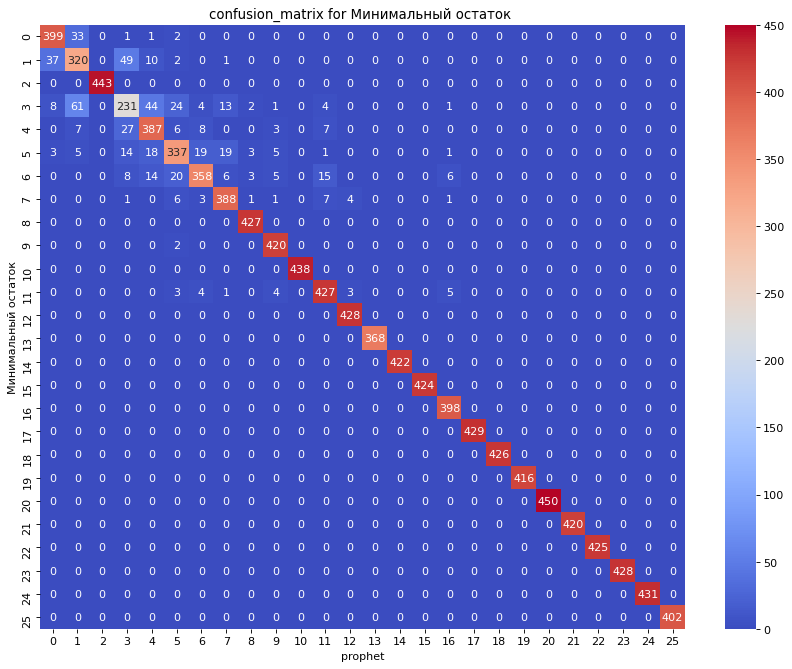

In [81]:
#plot_confusion_matrix(clf, df3['Минимальный остаток'], df3['prophet'])
fig,ax = plt.subplots(num=None, figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')
confusion_matrix = pd.crosstab(df3_min['Минимальный остаток'], df3_min['prophet'],
                               rownames=['Минимальный остаток'], colnames=['prophet'])

sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='coolwarm')
ax.set_title('confusion_matrix for Минимальный остаток ')
plt.show()

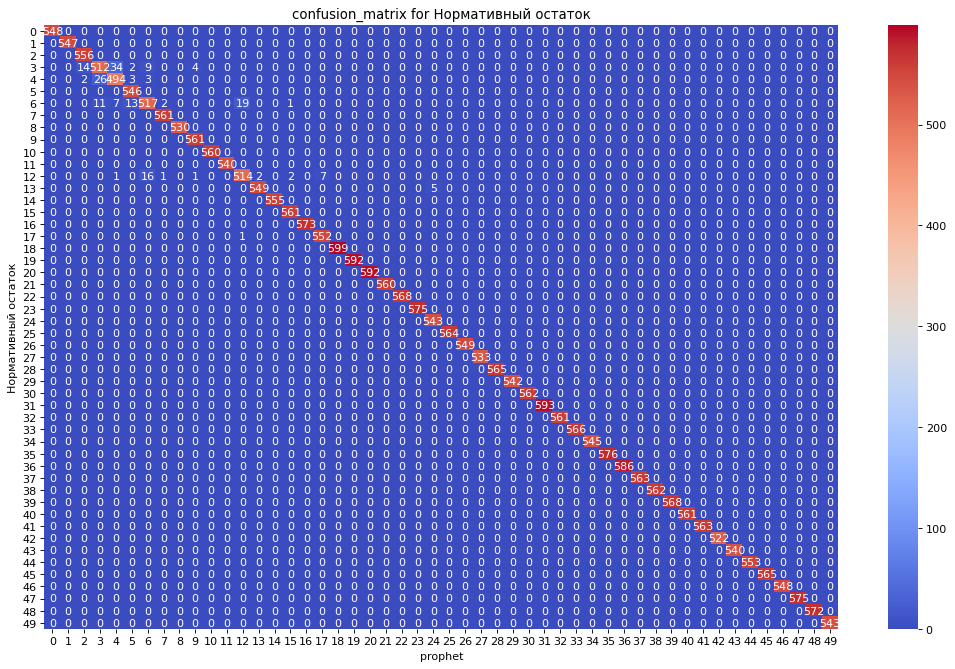

In [86]:
#plot_confusion_matrix(clf, df3['Минимальный остаток'], df3['prophet'])
fig,ax = plt.subplots(num=None, figsize=(16, 10), dpi=80, facecolor='w', edgecolor='k')
confusion_matrix = pd.crosstab(df3_max['Нормативный остаток'], df3_max['prophet'],
                               rownames=['Нормативный остаток'], colnames=['prophet'])

sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='coolwarm')
ax.set_title('confusion_matrix for Нормативный остаток')
plt.show()

In [83]:
confusion_matrix

prophet               0    1    2    3    4    5    6    7    8    9   ...  \
Нормативный остаток                                                    ...   
0                    548    0    0    0    0    0    0    0    0    0  ...   
1                      0  547    0    0    0    0    0    0    0    0  ...   
2                      0    0  556    0    0    0    0    0    0    0  ...   
3                      0    0   14  512   34    2    9    0    0    4  ...   
4                      0    0    2   26  494    3    3    0    0    0  ...   
5                      0    0    0    0    0  546    0    0    0    0  ...   
6                      0    0    0   11    7   13  517    2    0    0  ...   
7                      0    0    0    0    0    0    0  561    0    0  ...   
8                      0    0    0    0    0    0    0    0  530    0  ...   
9                      0    0    0    0    0    0    0    0    0  561  ...   
10                     0    0    0    0    0    0    0    0    0    0  ...   
11                     0    0    0    0    0    0    0    0    0    0  ...   
12                     0    0    0    0    1    0   16    1    0    1  ...   
13                     0    0    0    0    0    0    0    0    0    0  ...   
14                     0    0    0    0    0    0    0    0    0    0  ...   
15                     0    0    0    0    0    0    0    0    0    0  ...   
16                     0    0    0    0    0    0    0    0    0    0  ...   
17                     0    0    0    0    0    0    0    0    0    0  ...   
18                     0    0    0    0    0    0    0    0    0    0  ...   
19                     0    0    0    0    0    0    0    0    0    0  ...   
20                     0    0    0    0    0    0    0    0    0    0  ...   
21                     0    0    0    0    0    0    0    0    0    0  ...   
22                     0    0    0    0    0    0    0    0    0    0  ...   
23                     0    0    0    0    0    0    0    0    0    0  ...   
24                     0    0    0    0    0    0    0    0    0    0  ...   
25                     0    0    0    0    0    0    0    0    0    0  ...   
26                     0    0    0    0    0    0    0    0    0    0  ...   
27                     0    0    0    0    0    0    0    0    0    0  ...   
28                     0    0    0    0    0    0    0    0    0    0  ...   
29                     0    0    0    0    0    0    0    0    0    0  ...   
30                     0    0    0    0    0    0    0    0    0    0  ...   
31                     0    0    0    0    0    0    0    0    0    0  ...   
32                     0    0    0    0    0    0    0    0    0    0  ...   
33                     0    0    0    0    0    0    0    0    0    0  ...   
34                     0    0    0    0    0    0    0    0    0    0  ...   
35                     0    0    0    0    0    0    0    0    0    0  ...   
36                     0    0    0    0    0    0    0    0    0    0  ...   
37                     0    0    0    0    0    0    0    0    0    0  ...   
38                     0    0    0    0    0    0    0    0    0    0  ...   
39                     0    0    0    0    0    0    0    0    0    0  ...   
40                     0    0    0    0    0    0    0    0    0    0  ...   
41                     0    0    0    0    0    0    0    0    0    0  ...   
42                     0    0    0    0    0    0    0    0    0    0  ...   
43                     0    0    0    0    0    0    0    0    0    0  ...   
44                     0    0    0    0    0    0    0    0    0    0  ...   
45                     0    0    0    0    0    0    0    0    0    0  ...   
46                     0    0    0    0    0    0    0    0    0    0  ...   
47                     0    0    0    0    0    0    0    0    0    0  ...   
48                     0    0    0    0    0    0    0    0    0    0  ...   
49                    

In [69]:
# ЧТОЬ НЕ ЗАБЫТЬ:

## xgb_clf почитать о ней

## Где то здесь ошибка: 'KNeighborsClassifier_n_neighbors': [2, 3, 4, 5, 6, 7, 8]
## или ('KNeighborsClassifier', MultiOutputClassifier(KNeighborsClassifier()))

# clf = MultiOutputClassifier(KNeighborsClassifier()).fit(X, y)

# Так же посмотреть 

In [70]:
# 1. Поработать с дисбалансом до testsplit (чтоб заработала стратификация)
# 2. Поигарть с метриками как в папке  MIN-MAX
# 3. Советуют попробовать так же MSE метрику (настойчиво советуют)
# 4. Добавить колонку  минимальный остаток, чтоб понимать по каким мин у нас проваливаются метрики
# 5. Может сравнение все же делать с данными без балансировки??